# Boston Housing (Regression)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.csv

--2024-01-25 18:23:36--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.90, 52.95.148.130, 52.95.149.30, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/csv]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.09s   

2024-01-25 18:23:36 (448 KB/s) - ‘boston.csv’ saved [41084/41084]



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/bostonhousing.jpg" width="1200">


In [3]:
import pandas as pd
import numpy as np

In [4]:
### Target is PRICE
boston = pd.read_csv('boston.csv', sep=',')
boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Regressione lineare semplice

Cominciamo creando un modello di regressione lineare semplice, con un'unica feature. La feature che utilizzeremo è **RM**, cioè il numero di stanze per abitazione.
<br><br>
Creiamo i nostri array numpy per le features X e per il target Y, dopodichè usiamo la funzione <span style="font-family: Monaco">train_test_split</span> di scikit-learn per creare il *train set* e il *test set*.

In [5]:
X = boston["RM"].values # one feature
y = boston["PRICE"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

Adesso che abbiamo i nostri set di dati sotto forma di array numpy possiamo implementare la regressione lineare sul *train set* ed effettuare la predizione sul *test set*.
<br><br>
Al momento non preoccuparti delle reti neurali, di questo parleremo più avanti, sappi soltanto che per utilizzare Keras per eseguire una semplice regressione lineare ti basta creare un modello sequenziale utilizzando la classe <span style="font-family: Monaco">Sequential</span> e tramite il metodo <span style="font-family: Monaco">add</span>
aggiungere un unico strato creato con la classe <span style="font-family: Monaco">Dense</span>.
<br><br>
<span style="font-family: Monaco">Dense</span> prende come input il numero di output da tornare, in questo caso l'ouput sarà solo 1, cioè il risultato della regressione, e il numero di features del modello, che in questo caso è sempre 1.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(1, input_dim=1,))

# # Final output node
#model.add(Dense(1))

Adesso che abbiamo creato il nostro semplice modello dobbiamo configurare il processo di addestramento utilizzando il metodo <span style="font-family: Monaco">compile</span>.
<br>
Nello speicifico dobbiamo selezionare l'algoritmo di ottimizzazione da utilizzare e la funzione di costo da minimizzare.
<br>
L'algoritmo che utilizzeremo è lo Stochastic Gradient Descend (SGD) una variante del Gradient Descent che viene eseguito su un esempio per volta (parleremo nel dettaglio di questo algoritmo più avanti).
<br>
La funziona di costo da minimizzare è l'errore quadratico medio (mead squared error) che consiste nella media della somma degli errori al quadrato.
$$MSE = \frac{1}{N}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$
dove $\hat{Y}$ corrisponde alla predizione del modello.
<br><br>
**NOTA BENE** L'MSE corrisponde alla somma dei quadrati residui (RSS - Residual Sum of Squares) di cui viene calcolato il valore medio.

In [12]:
model.compile(optimizer='sgd', loss='mse')

Ora possiamo far partire l'addestramento vero e proprio utilizzando il metodo <span style="font-family: Monaco">fit</span>, passiamo come parametro il numero di epoche stabilendolo a 100.

In [13]:
model.fit(X_train, y_train,
          epochs=100
          )

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 85.4162
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 56.6820
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 56.1820
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 57.2173
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 68.1473
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 62.9873
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 55.5486
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 58.6135
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 54.2378
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 60.7810
Epoch 11/100
12/12 [==============================] - 0s 9ms/step - loss: 54.8742
Epoch 12/100
12/12 [==============================] - 0s 7ms/step - loss: 54.5104
Epoch 13/100
12/12 [=====

Nel mio caso, il valore della funzione di costo all'epoca 100 è di 42.31, questo vuol che mediamente il nostro modello si è sbagliato di $\sqrt{42.31} \approx{6.4}$, quindi essendo il taget **MEDV** rappresentato in migliaia di dollari, il nostro modello ha commesso errori nel predirre valori di un'abitazione in media di 6.4 dollari sul train set.
<br><br>
Osserviamo l'errore sul test set utilizzando il metodo <span style="font-family: Monaco">evaluate</span>

In [14]:
mse = model.evaluate(X_test, y_test)
print("MSE sul test set: %.4f" % mse)

5/5 [==============================] - 0s 3ms/step - loss: 67.6955
MSE sul test set: 67.6955


**NOTA BENE** dato che i pesi vengono inizializzati casualmente, i risultati dell'addestramento potrebbero variare, quindi se il mio risultato è differente dal tuo non preoccuparti, è tutto in regola.

Adesso possiamo utilizzare il modello creato per eseguire predizioni utilizzando il metodo <span style="font-family: Monaco">predict</span>.
<br>
Eseguiamo le predizioni sul test set.

In [15]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[23.835762],
       [23.432655],
       [27.082714],
       [18.68924 ],
       [23.797108],
       [23.74189 ],
       [37.127266],
       [31.373322],
       [24.272003],
       [23.371914],
       [32.405937],
       [24.851814],
       [26.110836],
       [25.205223],
       [25.751904],
       [27.62939 ],
       [25.243877],
       [22.190203],
       [28.153984],
       [23.322216],
       [25.282532],
       [20.390022],
       [26.519466],
       [20.721344],
       [25.674599],
       [28.198158],
       [28.396954],
       [29.760891],
       [21.632477],
       [26.53051 ],
       [24.376923],
       [35.27739 ],
       [29.263908],
       [26.541553],
       [19.003996],
       [25.553112],
       [29.622837],
       [23.824718],
       [23.570705],
       [36.525364],
       [13.730469],
       [26.629906],
       [24.095299],
       [26.337238],
       [28.766926],
       [24.713764],
       [34.24477 ],
       [27.46373 ],
       [23.487877],
       [25.166573],


Possiamo visualizzare i coefficenti bias e peso che il modello ha appreso tramite il metodo <span style="font-family: Monaco">get_weights</span>.

In [16]:
weight, bias = model.get_weights()
print("Bias: %.4f" % bias)
print("Peso: %.4f" % weight )

Bias: -9.1196
Peso: 5.5220


Visualizziamo i coefficenti (bias e peso) che il nostro modello ha imparato disegnando la retta da questi rappresentata in un grafico in 2 dimensioni.

Text(0, 0.5, 'Valore in $1000 [MEDV]')

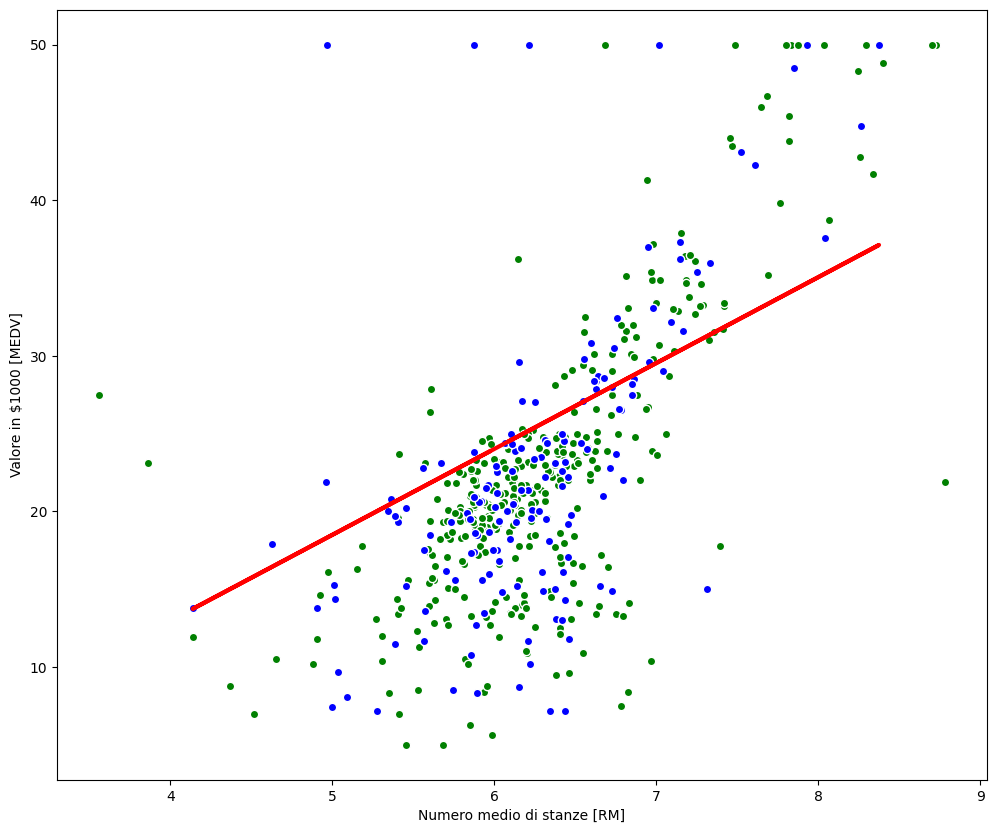

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12,10))
plt.scatter(X_train, y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, y_test, c="blue",  edgecolor='white', label="Test set")
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xlabel('Numero medio di stanze [RM]')
plt.ylabel('Valore in $1000 [MEDV]')

La retta approssima i dati abbastanza bene, l'errore alto è dato in gran parte dagli outliers, ovvero dai valori che si distaccano di molto dagli altri.<br>
Per ottenere un modello più preciso, e quindi ridurre l'errore, dobbiamo aggiungere ulteriori features significative.

## Regressione lineare multipla (tutte le features)
Adesso ripetiamo il processo utilizzando tutte le features presenti nel dataset.

In [27]:
X = boston.drop(["PRICE","Unnamed: 0"], axis=1).values
y = boston["PRICE"].values

In [28]:
X.shape

(506, 13)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

Avendo a che fare con più features è buona norma portare i dati su una scala comune, possiamo farlo applicando la standardizzazione utilizzando la classe <span style="font-family: Monaco">StandardScaler</span>

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso possiamo creare il modello, il processo è esattamente lo stesso, l'unica differenza è il numero di input, che ora è pari al numero di features nel dataset, cioè 13.

In [31]:
X_train.shape[1]==13

True

In [32]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1],activation='relu'))

# Final output node for prediction
model.add(Dense(1))

Configuriamo l'addestramento e avviamolo.

In [33]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [34]:
model.fit(X_train, y_train, ù
          epochs=100
          )

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 184.6850
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 28.3033
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 20.3242
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 18.4242
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 13.1593
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 13.4859
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 13.6481
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 13.8556
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 12.4518
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 14.3386
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 12.7256
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 11.1373
Epoch 13/100
12/12 [====

Il vaore della funzione di costo (MSE) alla 100esima epoca sul train set è di solo 9.5800, valutiamolo anche sul test set.

In [35]:
mse = model.evaluate(X_test,y_test)
print("MSE sul test set: %.4f" % mse)

5/5 [==============================] - 0s 3ms/step - loss: 25.4868
MSE sul test set: 25.4868


Osserviamo anche il valore del coefficiente di indeterminazione

Introduciamo un ulteriore metrica per valutare il nostro modello: **il coefficente di determinazione (R^2)**.<br>
$$ R^2 = 1-\frac{RSS}{SST}$$
dove $RSS$ è la somma dei quadrati residui:
$$RSS = \sum_{i=1}^{N}(Y_i-\hat{Y}_i)$$
ed SST è la somma dei quadrati totali:
$$SST = \sum_{i=1}^{N}(Y_i-Y_{mean})$$
<br>
in pratica R^2 è una versione standardizzata del MSE che torna un punteggio compreso tra 0 e 1 per il train set, mentre per il test set può assumere anche valori negativi.
    
* **R2_score < 0.3** il modello è inutile.
* **0.3 < R2_score < 0.5** il modello è scarso.     
* **0.5 < R2_score < 0.7** il modello è discreto.
* **0.7 < R2_score < 0.9** il modello è buono.
* **0.9 < R2_score < 1** il modello è ottimo.
* **R2_score = 1** molto probabilmente c'è un errore nel modello.

<br>
**NOTA BENE** R^2 non è una funzione di costo, ma di punteggio, un valore di 1 vuol dire che la predizione del modello è sempre corretta ( cosa improbabile in casi reali ). Quindi tanto più vicino ad 1 è l'R2 tanto migliore è il modello.
<br><br>

Per calcolare R^2 utilizziamo la funzione <span style="font-family: Monaco">r2_score</span> di scikit-learn.

In [36]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

5/5 [==============================] - 0s 3ms/step


0.7127357077369225

Il modello con tutte le features è decisamente migliore ed è ovvio che sia così, perché le informazioni a disposizone sono fondamentali per poter costruire modelli di machine learning robusti.

## Regressione lineare multipla -- Feature Selection

In [37]:
import seaborn as sns
cm = boston.corr()
cm

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
Unnamed: 0,1.000000,0.404600,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
CRIM,0.404600,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.103393,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.399439,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.003759,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.398736,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.079971,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.203784,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.302211,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.686002,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<Axes: >

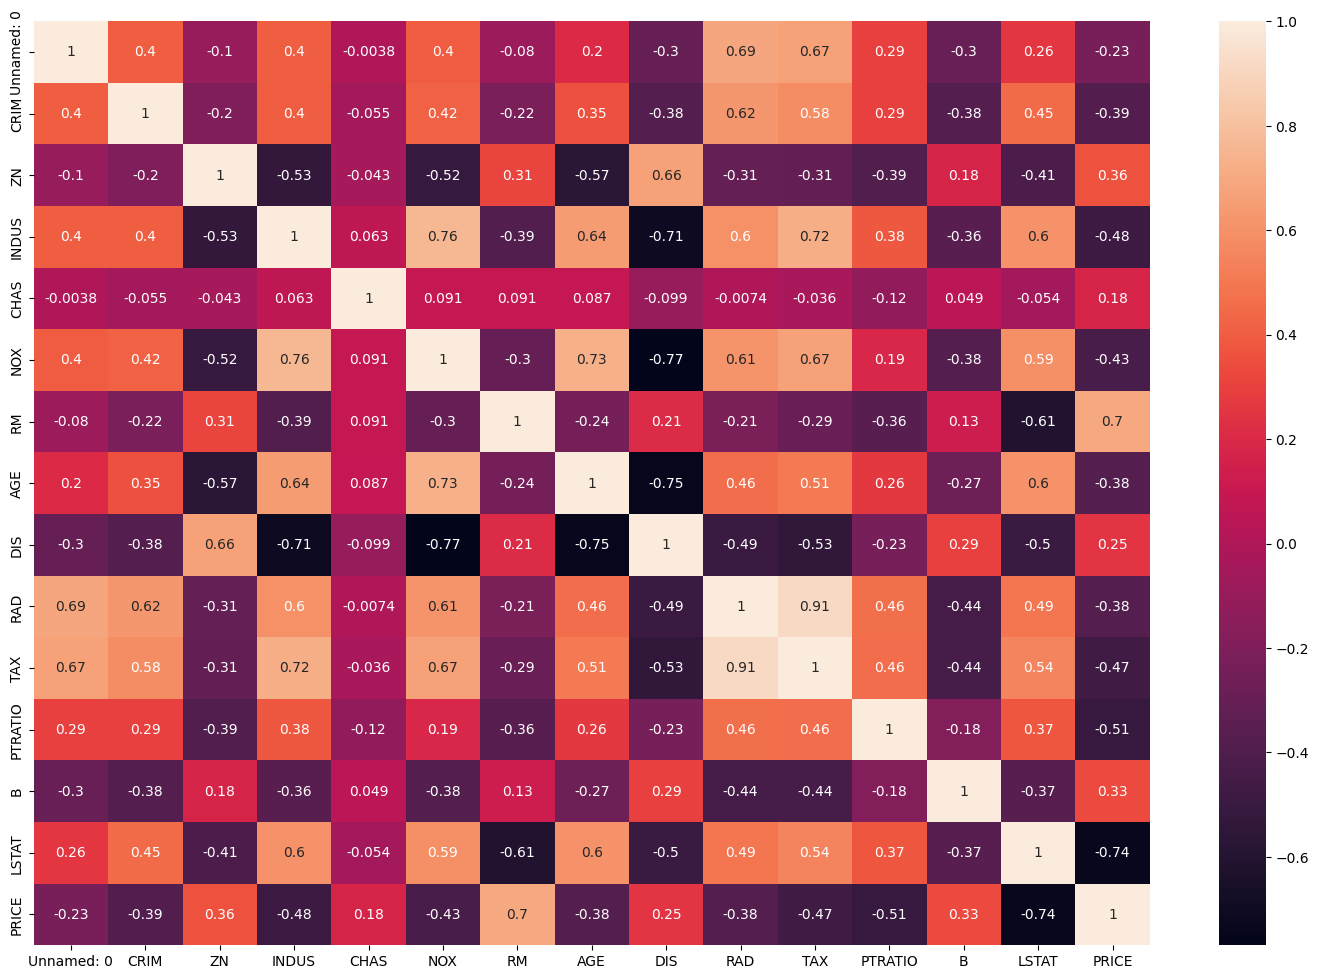

In [38]:
plt.figure(figsize=(18,12))
sns.heatmap(cm, annot=True)

## RM' 'LSTAT' --features selected

In [39]:
X = boston[['LSTAT','RM']].values
y = boston["PRICE"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [41]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1],activation='relu'))

# Final output node for prediction
model.add(Dense(1)) #output

In [42]:
model.compile(optimizer='sgd', loss='mse')

In [43]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 257.9912
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 20.4881
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 19.7934
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 18.7083
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 18.4210
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 18.4867
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 24.3630
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 18.6192
Epoch 9/150
12/12 [==============================] - 0s 3ms/step - loss: 18.0797
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 17.7526
Epoch 11/150
12/12 [==============================] - 0s 2ms/step - loss: 18.5463
Epoch 12/150
12/12 [==============================] - 0s 2ms/step - loss: 20.1649
Epoch 13/150
12/12 [====

In [44]:
mse = model.evaluate(X_test,y_test)
print("MSE sul test set: %.4f" % mse)

5/5 [==============================] - 0s 3ms/step - loss: 30.0420
MSE sul test set: 30.0420


In [45]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

5/5 [==============================] - 0s 2ms/step


0.661393071105572